In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
from typing import List, Tuple, Union

def fast_hist(array: List[Union[int, float]], 
              bins: int) -> Tuple[List[int], List[float]]:
    """
    Builds bins' labels and bins' value counts for given array
    :param array: array with numeric values
    :param bins:  number of bins in result distribution
    :return: Two lists: 
             first contains value counts of each bin,
             second contains list of bins' labels
    """
    array = np.array(array)
    left = array.min()
    right = array.max()
    step = (right - left) / bins
    if step == 0.:
        step = 0.1

    as_indices = np.clip(((array - left) / step).astype(int), 
        0,
        bins - 1)
    values, value_cnts = np.unique(as_indices, return_counts=True)

    res_y = np.zeros(bins, dtype=int)
    res_y[values] = value_cnts

    return res_y, np.linspace(left, right, bins + 1)

def fast_hist_show(array: List[Union[int, float]], bins: int):
    res_y, res_x = fast_hist(array, bins)
    plt.bar(res_x[:-1], res_y, 1. / (bins * 1.2))

## Замеры

In [3]:
test_array = np.random.rand(10000)
bins_cnt = 100

### plt.hist

45.2 ms ± 668 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


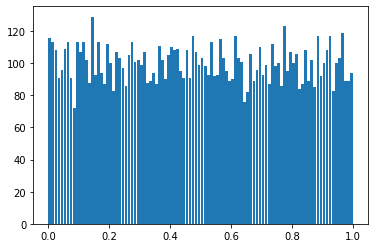

In [4]:
%timeit plt.hist(test_array, bins=bins_cnt, rwidth=0.9)

### fast_hist

561 µs ± 3.15 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
45.3 ms ± 661 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


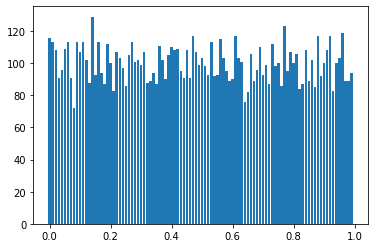

In [5]:
%timeit fast_hist(test_array, bins_cnt)
%timeit fast_hist_show(test_array, bins_cnt)